# Import libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import shutil


In [ ]:
# Load the CSV file
data = pd.read_csv('data.csv')
data.head()

Unnamed: 0                                BBX_ID             ImageName  \
0          10  e8777ec7-ede3-4c95-bc5f-fa2c8121d676  11f6a0339eb766d0.jpg   
1          13  29094eb4-84f8-428f-ba51-91f61157fbec  12d15d164f5bbf33.jpg   
2          15  afc47a79-509c-49f5-a383-66cfe33cd49c  12da36c3da0f098c.jpg   
3          16  8c25625e-07df-47f2-9c4b-a167a4e4a124  12da36c3da0f098c.jpg   
4          17  c46aadda-9e4d-4d84-b304-6377c920476b  12da36c3da0f098c.jpg   

  LabelName      XMin      XMax      YMin      YMax  frame_width  \
0    person  0.321250  0.408125  0.241111  0.760000       1024.0   
1    person  0.336466  0.611842  0.059375  0.404375        681.0   
2    person  0.038281  0.194531  0.305208  0.536458       1024.0   
3    person  0.196875  0.592969  0.310417  0.430208       1024.0   
4    person  0.698438  0.728125  0.291667  0.437500       1024.0   

   frame_height       axmin       axmax       aymin       aymax     rarea  
0         576.0  328.960000  417.920000  138.879936  437.760000  0.045078  
1        1024.0  229.133346  416.664402   60.800000  414.080000  0.095005  
2         768.0   39.199744  199.199744  234.399744  411.999744  0.036133  
3         768.0  201.600000  607.200256  238.400256  330.399744  0.047448  
4         768.0  715.200512  745.600000  224.000256  336.000000  0.004329

In [ ]:
data['LabelName'].value_counts()

LabelName
person           155466
light_vehicle     33352
bike               8086
heavy_vehicle      2467
train              2369
Name: count, dtype: int64

# Create a subset of data and rename images with their class name

In [ ]:

# Load the CSV file
csv_file = 'data.csv'
df = pd.read_csv(csv_file)

# Directory where images are stored
image_dir = 'C:/Users/Muhammad Farhan/Practice/Task_ML/filtered_images'
output_dir = 'C:/Users/Muhammad Farhan/Practice/Task_ML'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Classes and the number of samples per class
classes = ['person', 'light_vehicle', 'bike', 'heavy_vehicle', 'train']
samples_per_class = 100

# Function to organize images
def organize_images(df, image_dir, output_dir, classes, samples_per_class):
    for class_name in classes:
        # Filter the DataFrame for the current class
        class_df = df[df['LabelName'] == class_name]

        # Ensure we have enough samples
        if len(class_df) < samples_per_class:
            print(f"Warning: Not enough samples for class {class_name}. Only {len(class_df)} available.")
            samples_per_class = len(class_df)

        # Sample the required number of images
        sampled_df = class_df.sample(n=samples_per_class, random_state=42).reset_index(drop=True)

        # Create a directory for the current class
        class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        # Copy and rename the images
        for idx, row in sampled_df.iterrows():
            image_name = row['ImageName']
            src_path = os.path.join(image_dir, image_name)
            new_image_name = f"{class_name}_{idx + 1}.jpg"
            dst_path = os.path.join(class_dir, new_image_name)
            if os.path.exists(src_path):
                shutil.copy(src_path, dst_path)
            else:
                print(f"Image {src_path} not found. Skipping.")

# Organize the images
organize_images(df, image_dir, output_dir, classes, samples_per_class)


# Resize images with 640*640

In [ ]:
import os
from PIL import Image

# Define the path to the classes folder
classes_path = r'C:\Users\Muhammad Farhan\Practice\Task_ML\class'
output_dir = r'C:\Users\Muhammad Farhan\Practice\Task_ML\resized_class'

# List of classes
classes = ['person', 'light_vehicle', 'bike', 'heavy_vehicle', 'train']

# Desired size
new_size = (640, 640)

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Resize and save images
for class_name in classes:
    class_dir = os.path.join(classes_path, class_name)
    output_class_dir = os.path.join(output_dir, class_name)

    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    for img_name in os.listdir(class_dir):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)

            # Resize the image
            img_resized = img.resize(new_size, Image.ANTIALIAS)

            # Save the resized image
            output_img_path = os.path.join(output_class_dir, img_name)
            img_resized.save(output_img_path)

print("All images have been resized and saved successfully.")


# Exploratory Data Analysis

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImageName  500 non-null    object
 1   ClassName  500 non-null    object
 2   Width      500 non-null    int64 
 3   Height     500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB
None

Sample Data:
        ImageName ClassName  Width  Height
0    person_1.jpg    person    640     640
1   person_10.jpg    person    640     640
2  person_100.jpg    person    640     640
3   person_11.jpg    person    640     640
4   person_12.jpg    person    640     640


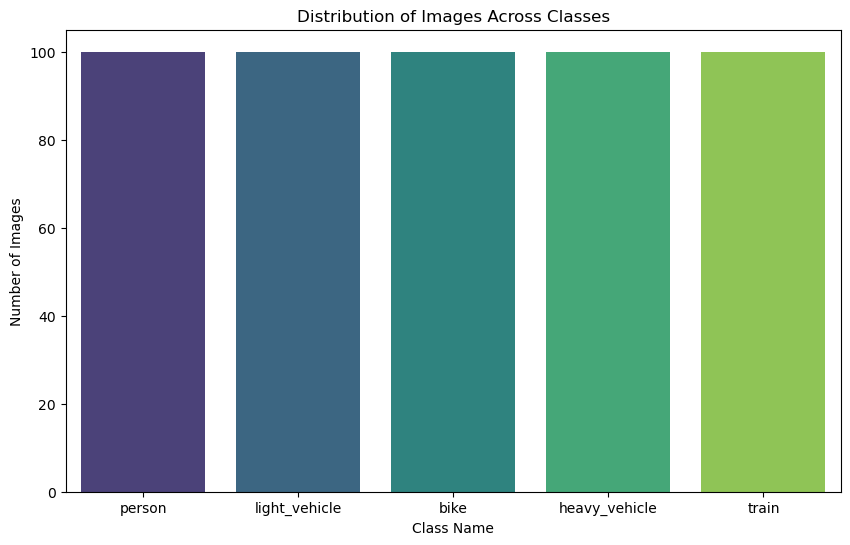

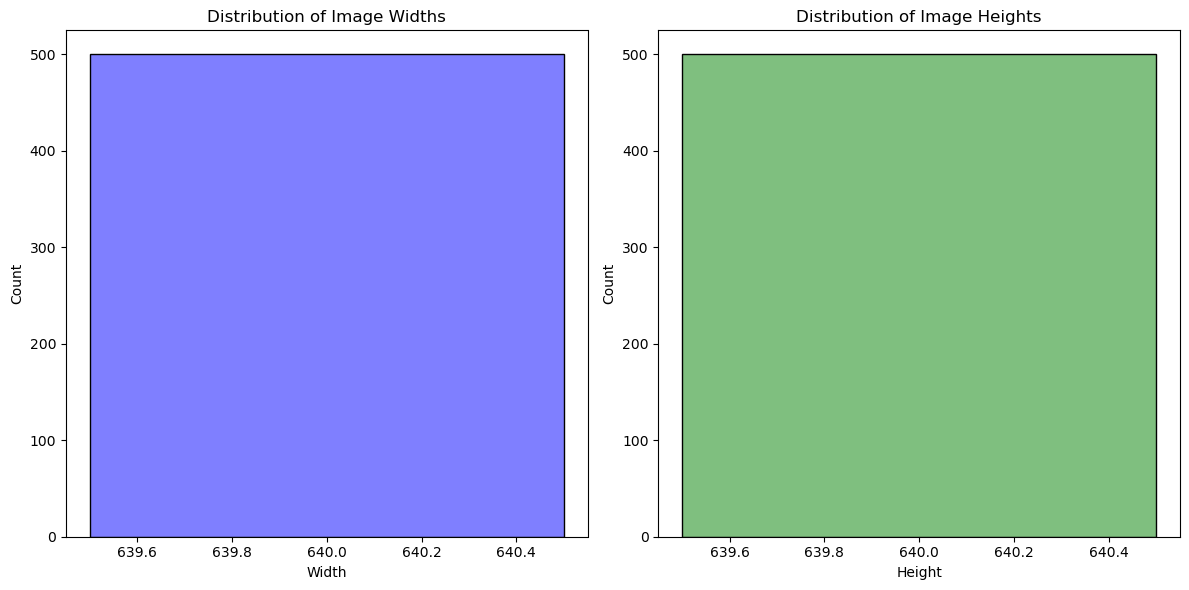

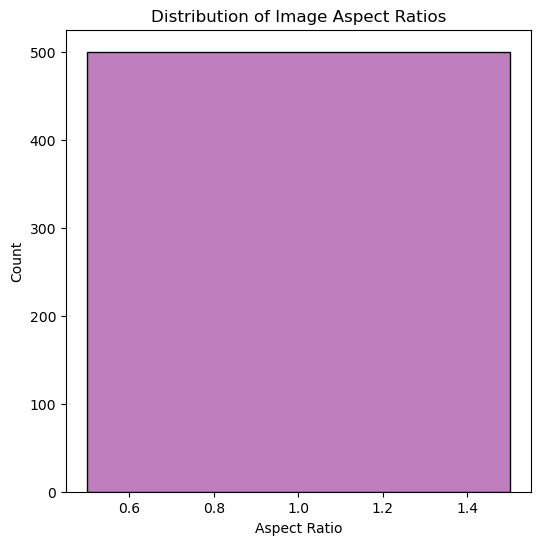

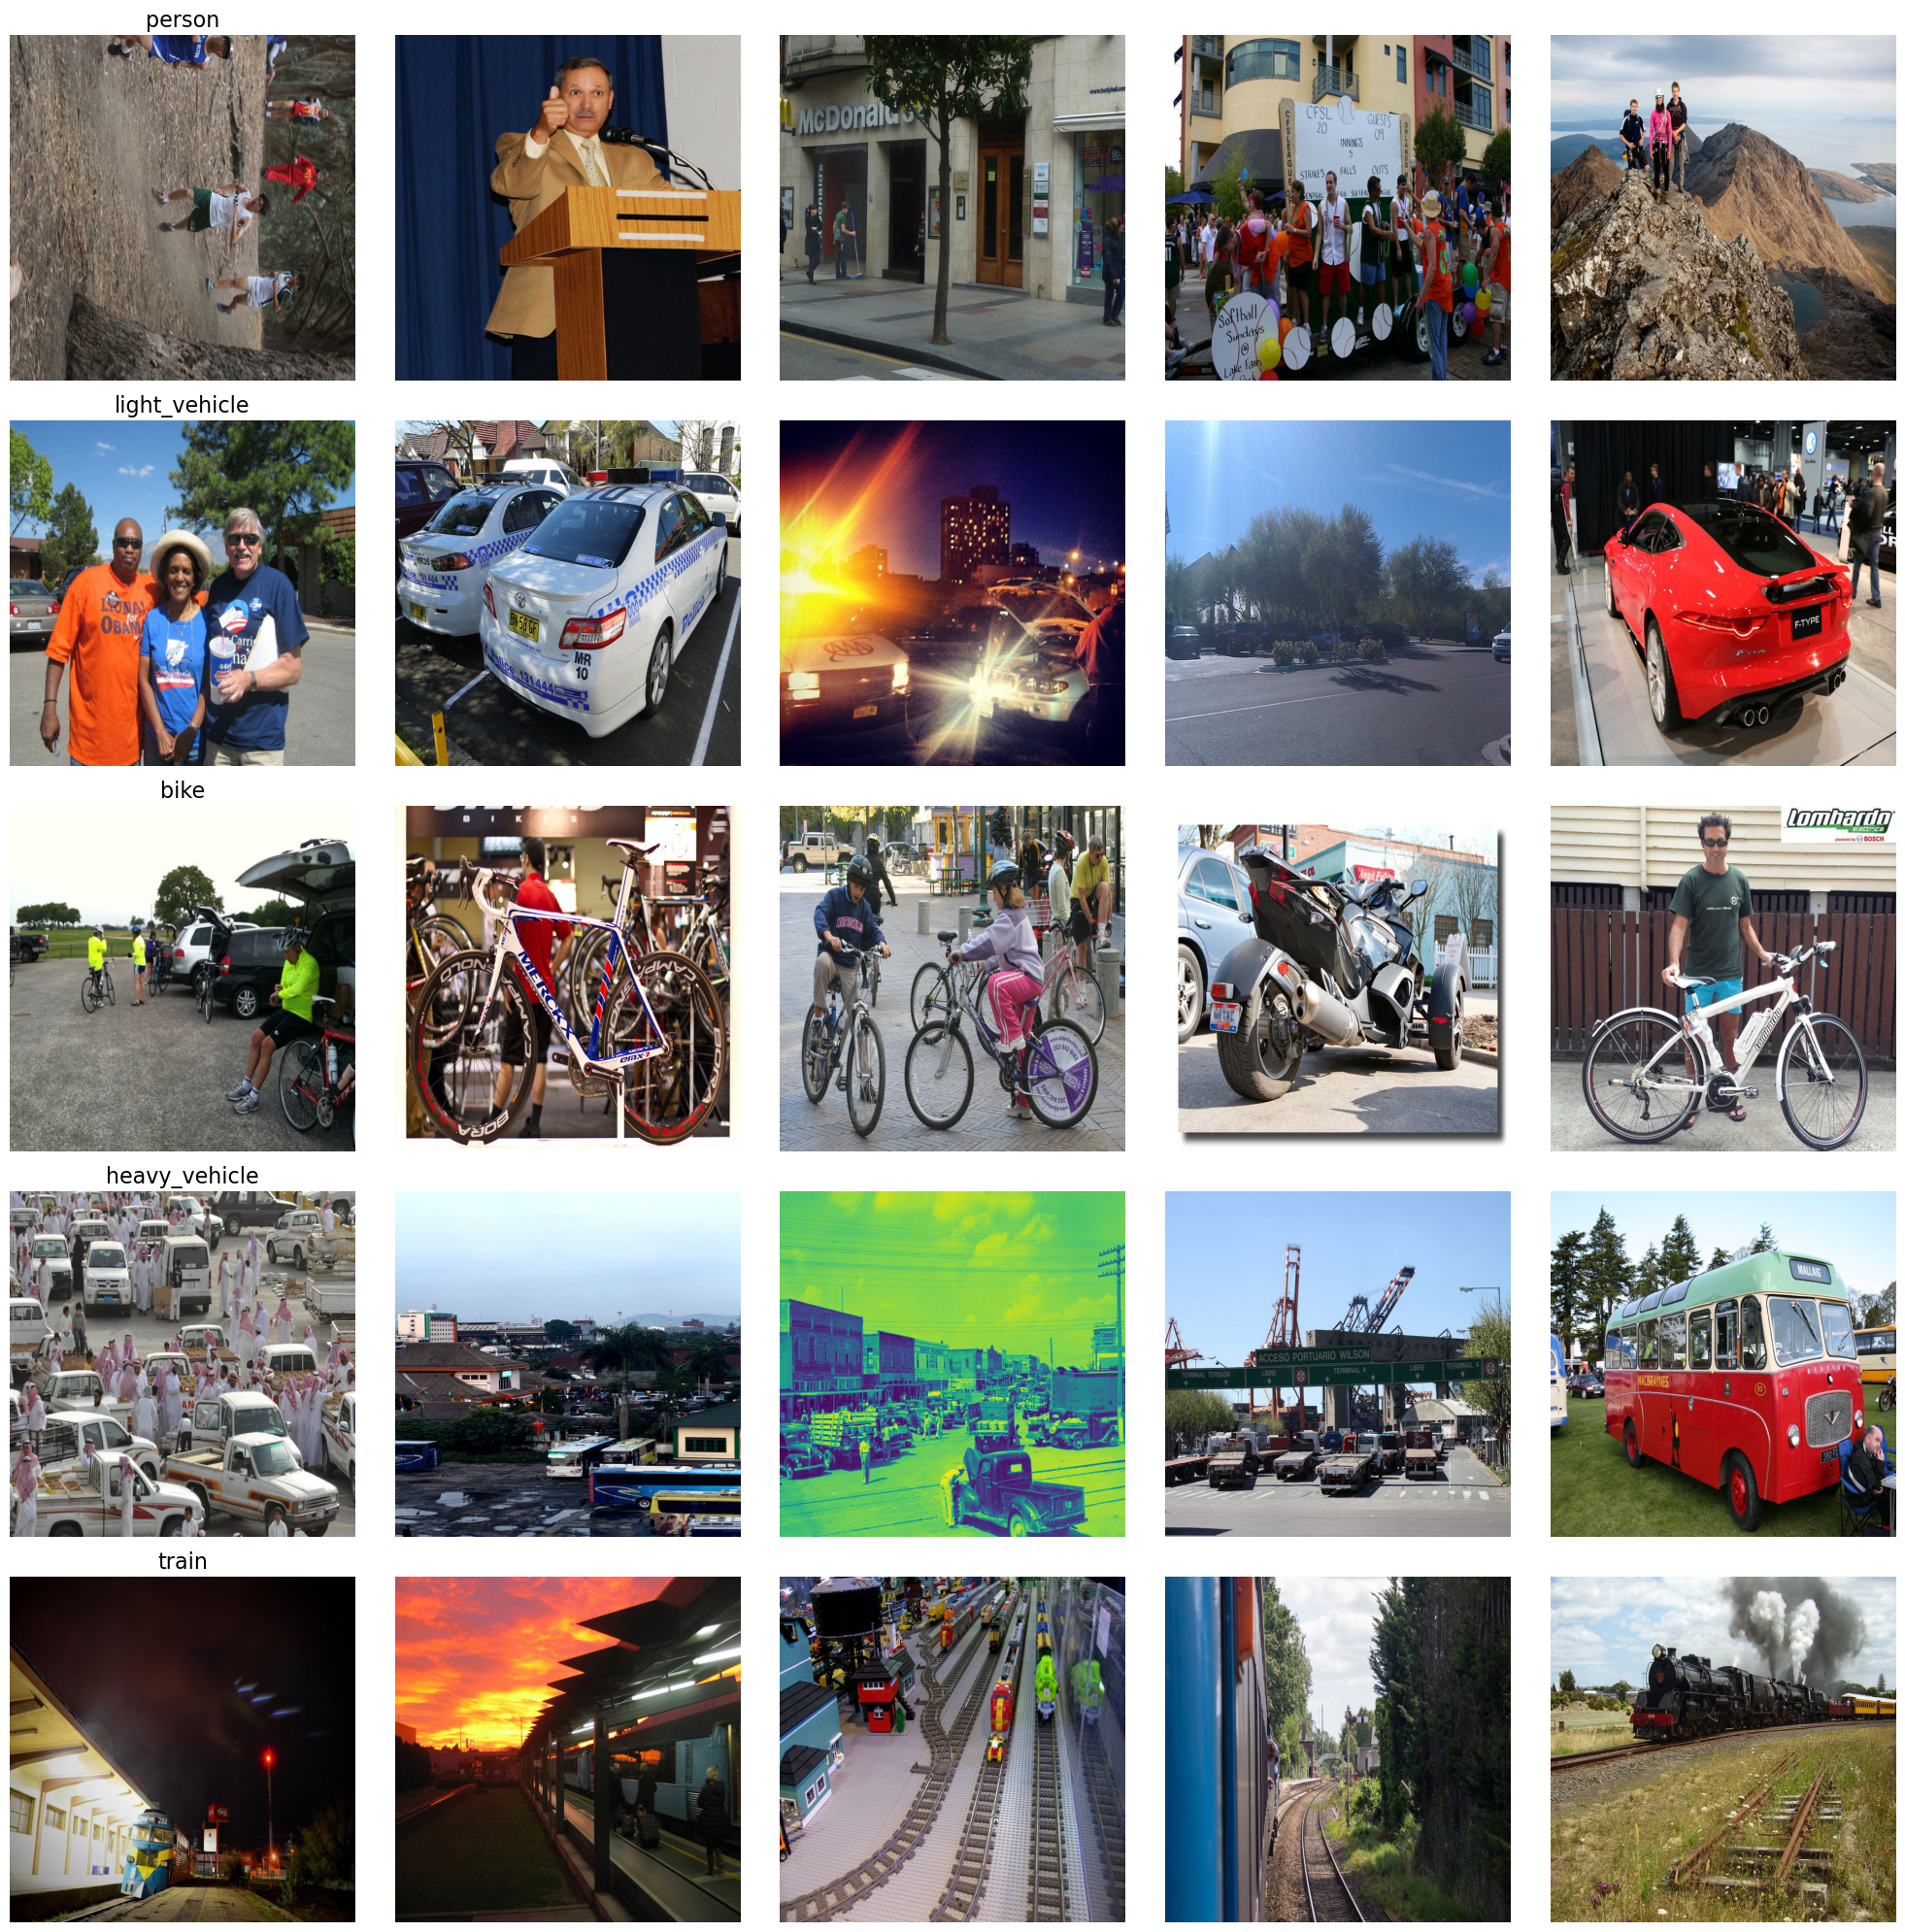


Class Distribution Statistics:
               Width             Height             AspectRatio            
                mean median  std   mean median  std        mean median  std
ClassName                                                                  
bike           640.0  640.0  0.0  640.0  640.0  0.0         1.0    1.0  0.0
heavy_vehicle  640.0  640.0  0.0  640.0  640.0  0.0         1.0    1.0  0.0
light_vehicle  640.0  640.0  0.0  640.0  640.0  0.0         1.0    1.0  0.0
person         640.0  640.0  0.0  640.0  640.0  0.0         1.0    1.0  0.0
train          640.0  640.0  0.0  640.0  640.0  0.0         1.0    1.0  0.0


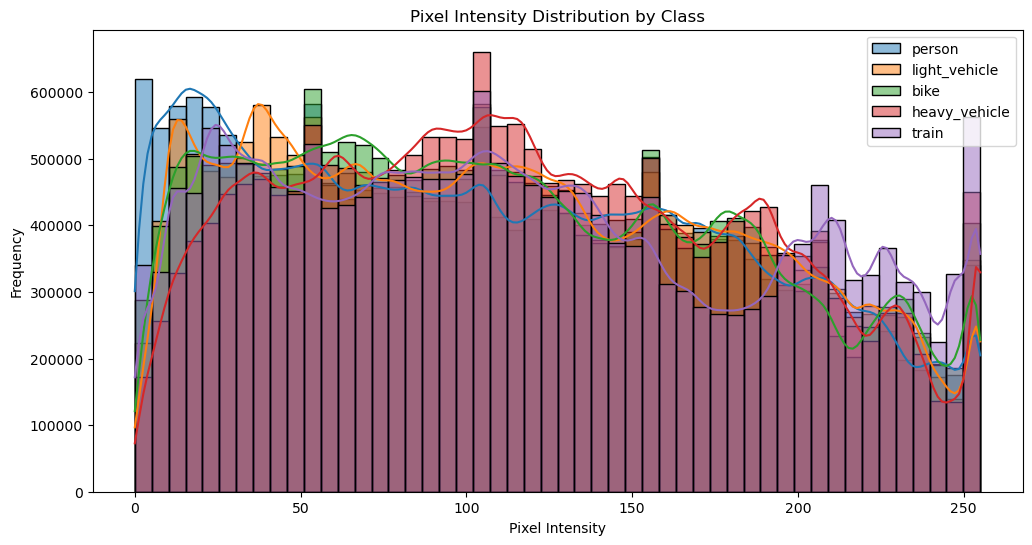

In [ ]:
# Define the path to the classes folder
classes_path = r'C:\Users\Muhammad Farhan\Practice\Task_ML\class'

# List of classes
classes = ['person', 'light_vehicle', 'bike', 'heavy_vehicle', 'train']

# Create a DataFrame to hold image data
data = []

# Load images and their properties
for class_name in classes:
    class_dir = os.path.join(classes_path, class_name)
    for img_name in os.listdir(class_dir):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                width, height = img.size
            data.append([img_name, class_name, width, height])

# Create DataFrame
df = pd.DataFrame(data, columns=['ImageName', 'ClassName', 'Width', 'Height'])

# Display basic information
print("Basic Information:")
print(df.info())

print("\nSample Data:")
print(df.head())

# Plot the distribution of images across classes
plt.figure(figsize=(10, 6))
sns.countplot(x='ClassName', data=df, palette='viridis')
plt.title('Distribution of Images Across Classes')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

# Analyze image dimensions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Width'], kde=True, color='blue')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')

plt.subplot(1, 2, 2)
sns.histplot(df['Height'], kde=True, color='green')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')

plt.tight_layout()
plt.show()

# Analyze aspect ratio
df['AspectRatio'] = df['Width'] / df['Height']
plt.figure(figsize=(6, 6))
sns.histplot(df['AspectRatio'], kde=True, color='purple')
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.show()

# Display sample images from each class
def display_samples(df, classes_path, classes, samples_per_class=5):
    fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(samples_per_class * 4, len(classes) * 4))
    for i, class_name in enumerate(classes):
        class_df = df[df['ClassName'] == class_name]
        sample_images = class_df.sample(samples_per_class, random_state=42)['ImageName'].values
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(classes_path, class_name, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_name, fontsize=16)
    plt.tight_layout()
    plt.show()

display_samples(df, classes_path, classes)

# Class Distribution Statistics
print("\nClass Distribution Statistics:")
class_stats = df.groupby('ClassName').agg({
    'Width': ['mean', 'median', 'std'],
    'Height': ['mean', 'median', 'std'],
    'AspectRatio': ['mean', 'median', 'std']
})
print(class_stats)


# Image Intensity Analysis
def analyze_image_intensity(image_dir, num_images=50):
    intensities = []
    for img_name in os.listdir(image_dir)[:num_images]:
        img_path = os.path.join(image_dir, img_name)
        with Image.open(img_path) as img:
            img = img.convert('L')  # Convert to grayscale
            intensities.append(np.array(img).flatten())
    intensities = np.concatenate(intensities)
    return intensities

plt.figure(figsize=(12, 6))
for class_name in classes:
    class_dir = os.path.join(classes_path, class_name)
    intensities = analyze_image_intensity(class_dir)
    sns.histplot(intensities, kde=True, bins=50, label=class_name)
plt.title('Pixel Intensity Distribution by Class')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Prepare the dataset into train=60%, validation=20% and test=20%

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to the classes folder
classes_path = r'C:/Users/Muhammad Farhan/Practice/Task_ML/class'

# List of classes
classes = ['person', 'light_vehicle', 'bike', 'heavy_vehicle', 'train']

# Define the paths for train, validation, and test folders
train_path = r'C:/Users/Muhammad Farhan/Practice/Task_ML/train'
valid_path = r'C:/Users/Muhammad Farhan/Practice/Task_ML/validation'
test_path = r'C:/Users/Muhammad Farhan/Practice/Task_ML/test'

# Create train, validation, and test folders if they don't exist
for path in [train_path, valid_path, test_path]:
    if not os.path.exists(path):
        os.makedirs(path)

# Split the dataset into train, validation, and test sets
for class_name in classes:
    class_dir = os.path.join(classes_path, class_name)

    # Get list of images for current class
    images = [img for img in os.listdir(class_dir) if img.endswith('.jpg')]

    # Split into train, validation, and test sets
    train_images, test_valid_images = train_test_split(images, test_size=0.4, random_state=42)
    valid_images, test_images = train_test_split(test_valid_images, test_size=0.5, random_state=42)

    # Move images to respective folders
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dst_path = os.path.join(train_path, class_name, img)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for img in valid_images:
        src_path = os.path.join(class_dir, img)
        dst_path = os.path.join(valid_path, class_name, img)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(class_dir, img)
        dst_path = os.path.join(test_path, class_name, img)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Dataset split into train, validation, and test sets successfully.")


# Prepare the training data based on yolo v6 requirements

In [ ]:
import os
import pandas as pd
import shutil
import random
from PIL import Image

# Define class mapping if needed
class_map = {
    'person': 0,
    'light_vehicle': 1,
    'bike': 2,
    'heavy_vehicle': 3,
    'train': 4,
}

# Function to convert bounding box coordinates to YOLO format
def convert_to_yolo_format(class_name, xmin, ymin, xmax, ymax, img_width, img_height, target_width, target_height):
    x_center = (xmin + xmax) / 2 / img_width
    y_center = (ymin + ymax) / 2 / img_height
    box_width = (xmax - xmin) / target_width
    box_height = (ymax - ymin) / target_height

    return f"{class_map[class_name]} {x_center} {y_center} {box_width} {box_height}"


# Function to create YOLO dataset structure
def create_yolo_dataset(images_folder, annotations_csv, output_folder, sample_size=500, val_split=0.15, test_split=0.15):
    # Ensure output directory structure
    os.makedirs(os.path.join(output_folder, 'images/train'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'images/val'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'images/test'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'labels/train'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'labels/val'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'labels/test'), exist_ok=True)

    # Load CSV containing image and annotation information
    df = pd.read_csv(annotations_csv)

    # Randomly select sample_size images
    random.seed(42)  # For reproducibility
    selected_images = random.sample(os.listdir(images_folder), sample_size)

    # Split into train, val, test sets
    num_val = int(val_split * sample_size)
    num_test = int(test_split * sample_size)
    num_train = sample_size - num_val - num_test

    train_images = selected_images[:num_train]
    val_images = selected_images[num_train:num_train + num_val]
    test_images = selected_images[num_train + num_val:]

    # Copy images, resize and create YOLO format labels
    for phase, images in [('train', train_images), ('val', val_images), ('test', test_images)]:
        for image_name in images:
            # Copy and resize image
            image_path_src = os.path.join(images_folder, image_name)
            image_path_dest = os.path.join(output_folder, f'images/{phase}/{image_name}')

            # Create YOLO format label file
            label_name = os.path.splitext(image_name)[0] + '.txt'
            label_file = os.path.join(output_folder, f'labels/{phase}/{label_name}')

            with open(label_file, 'w') as f:
                # Filter annotations for current image
                annotations = df[df['ImageName'] == image_name]

                # Get image dimensions for resizing
                img = Image.open(image_path_dest)
                img_width, img_height = img.size

                # Convert to YOLO format using resized image dimensions
                for index, annotation in annotations.iterrows():
                    class_name = annotation['LabelName']
                    xmin = annotation['XMin'] * img_width
                    ymin = annotation['YMin'] * img_height
                    xmax = annotation['XMax'] * img_width
                    ymax = annotation['YMax'] * img_height

                    # Pass target size for YOLO format
                    yolo_line = convert_to_yolo_format(class_name, xmin, ymin, xmax, ymax,
                                                       img_width, img_height, 640, 640)
                    f.write(yolo_line + '\n')

    print(f"Custom dataset created in {output_folder}.")

# Paths and parameters
images_folder = 'C:/Users/Muhammad Farhan/Downloads/filtered_images'  # Path to your filtered images folder
annotations_csv = 'data.csv'  # Path to your CSV file containing annotations
output_folder = 'C:/Users/Muhammad Farhan/Downloads/custom_dataset_resized'  # Output directory for the custom dataset
sample_size = 500

# Create YOLO v6 dataset structure
create_yolo_dataset(images_folder, annotations_csv, output_folder, sample_size)


In [ ]:
# Function to rename files in a directory
def rename_files_in_directory(directory, prefix):
    # Get list of files
    files = os.listdir(directory)
    # Sort files for consistent order
    files.sort()

    # Rename files sequentially
    for i, filename in enumerate(files):
        _, ext = os.path.splitext(filename)
        new_filename = f"{prefix}{i}{ext}"
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
        print(f"Renamed {filename} to {new_filename}")

# Paths to your custom_dataset folders
dataset_folder = 'C:/Users/Muhammad Farhan/Downloads/custom_dataset_resized'

# Rename images in train, val, test folders
rename_files_in_directory(os.path.join(dataset_folder, 'images/train/'), 'train')
rename_files_in_directory(os.path.join(dataset_folder, 'images/val/'), 'val')
rename_files_in_directory(os.path.join(dataset_folder, 'images/test/'), 'test')

# Rename labels in train, val, test folders
rename_files_in_directory(os.path.join(dataset_folder, 'labels/train/'), 'train')
rename_files_in_directory(os.path.join(dataset_folder, 'labels/val/'), 'val')
rename_files_in_directory(os.path.join(dataset_folder, 'labels/test/'), 'test')

print("Images and labels renamed successfully.")


# Clone yolo v6 git repository

In [ ]:
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3838, done.
remote: Counting objects: 100% (1718/1718), done.
remote: Compressing objects: 100% (330/330), done.
remote: Total 3838 (delta 1510), reused 1400 (delta 1388), pack-reused 2120
Receiving objects: 100% (3838/3838), 47.12 MiB | 16.38 MiB/s, done.
Resolving deltas: 100% (2342/2342), done.
/content/YOLOv6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0

# Model training

In [ ]:
!python /content/YOLOv6/tools/train.py --batch 32 --conf /content/YOLOv6/configs/yolov6s.py --epochs 200 --img-size 640 --data /content/YOLOv6/data/dataset.yaml --device 0


2024-06-21 17:04:48.878356: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 17:04:48.878408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 17:04:49.007641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 17:04:49.181990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 17:04:51.349271: W tensorflow/compiler/tf2

# Model evaluation

In [ ]:
# Run evaluation
!python tools/eval.py --data /content/YOLOv6/data/dataset.yaml --img-size 640 --weights /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt --device 0



Namespace(data='/content/YOLOv6/data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.50M, Gflops: 45.17
img record infomation path is:/content/YOLOv6/data/images/.val_cache.json
Val: Checking formats of labels with 2 process(es): 
75 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 75/75 [00:00<00:00, 1367.08it/s]
Convert to COCO format
100% 75/75 [00:00<00:00, 50

# Model test

In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml /content/YOLOv6/data/dataset.yaml --weights /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt --source /content/YOLOv6/data/images/test --device 0



Namespace(weights='/content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt', source='/content/YOLOv6/data/images/test', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/data/dataset.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 75/75 [00:02<00:00, 25.62it/s]
Results saved to runs/inference/exp


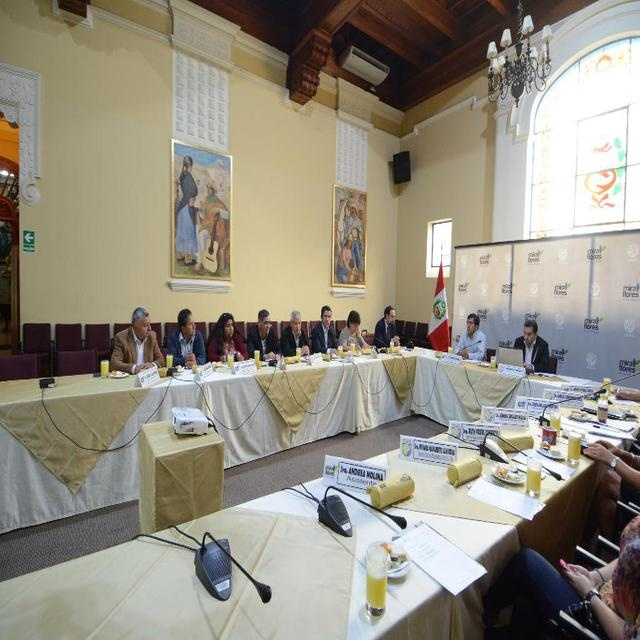

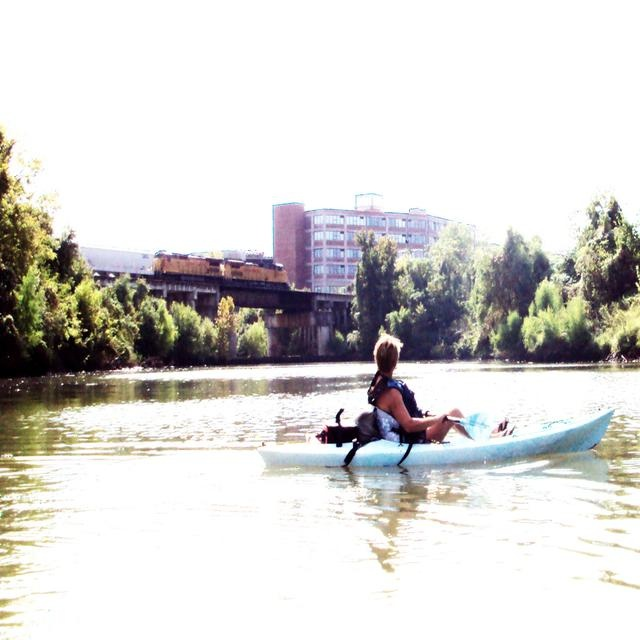

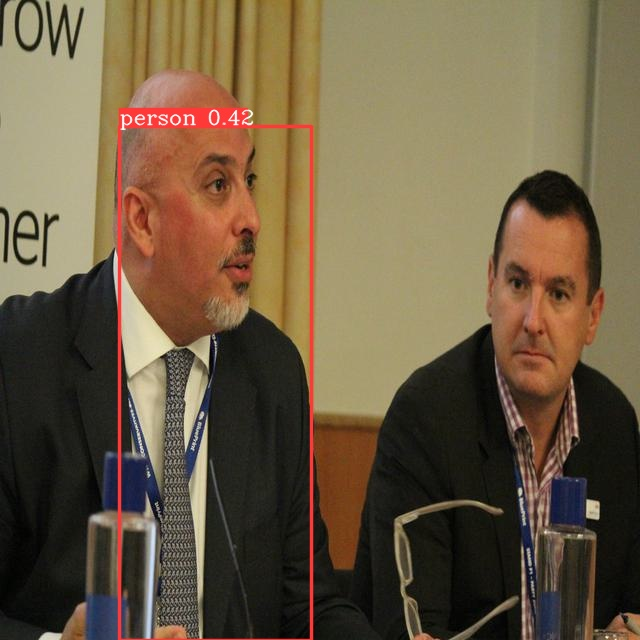

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('/content/YOLOv6/runs/inference/exp/test/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

**Discussion of the performance**: Overall performance is low due to shortage of training samples. The training sample is 350 images which is very small. This is why the algorithm did not learn properly and could not capture any possible patterns in the data. But it was able to identify a person from the test data.